In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from matplotlib.ticker import FuncFormatter
%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
sns.set_style('darkgrid')


In [3]:
df = pd.read_excel('D:\prediction_data/Data_DAP.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3355 entries, 0 to 3354
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        3355 non-null   object 
 1   price        3355 non-null   object 
 2   timeStamp    0 non-null      float64
 3   hang         3355 non-null   object 
 4   dong         3355 non-null   object 
 5   namdangki    3355 non-null   int64  
 6   soKM         3355 non-null   int64  
 7   tinhTrang    3355 non-null   object 
 8   loaiXe       3355 non-null   object 
 9   dungTich     2941 non-null   object 
 10  xuatXu       0 non-null      float64
 11  chinhSachBH  3355 non-null   object 
 12  TrongLuong   3355 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 340.9+ KB


In [5]:
df.isna().sum()

title             0
price             0
timeStamp      3355
hang              0
dong              0
namdangki         0
soKM              0
tinhTrang         0
loaiXe            0
dungTich        414
xuatXu         3355
chinhSachBH       0
TrongLuong        0
dtype: int64

1. Data Processing

In [6]:
# drop columns not
df['price'] = df['price'].str.replace('.', '').str.replace('đ', '')
df.drop(columns=['timeStamp'], inplace=True)
df.drop(columns=['xuatXu'], inplace=True)
df.drop(columns=['title'], inplace=True)
df.drop(columns=['TrongLuong'], inplace=True)

2. Mising Values

In [7]:
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum())*100)/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], 
                         sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

,Total,Percent
dungTich,414,12.339791
price,0,0.000000
hang,0,0.000000
namdangki,0,0.000000
dong,0,0.000000
soKM,0,0.000000
tinhTrang,0,0.000000
loaiXe,0,0.000000
chinhSachBH,0,0.000000


In [8]:
df['dungTich'].fillna('?', inplace=True)


filtered_data = df[df['dungTich'].str.count('\?') > 0]['dong']

# In ra các dòng duy nhất trong cột 'dong'
unique_dongs_with_question_mark = filtered_data.unique()

# In ra tên các dòng unique trong cột 'dong' có kí tự '?' ở cột 'dungTich' tương ứng
for dong in unique_dongs_with_question_mark:
    print("Row:", dong, "- have missing value:", 
          filtered_data[filtered_data == dong].count())

Row: SH - have missing value: 10
Row: Vision - have missing value: 46
Row: Exciter - have missing value: 68
Row: Winner X - have missing value: 33
Row: Wave - have missing value: 58
Row: Winner - have missing value: 19
Row: Lead - have missing value: 15
Row: Liberty - have missing value: 14
Row: Air Blade - have missing value: 49
Row: Nouvo - have missing value: 11
Row: Vespa - have missing value: 54
Row: Dream - have missing value: 15
Row: R - have missing value: 12
Row: Dòng khác - have missing value: 9
Row: Blade - have missing value: 1


2.1. Handeling Missing Value

In [9]:
dong_list = ['SH', 'Vision', 'Exciter', 'Winner X', 'Wave', 'Winner', 'Lead', 'Liberty', 
             'Air Blade', 'Nouvo', 'Vespa', 'Dream', 'R', 'Dòng khác', 'Blade']

# Lặp qua từng dòng và in ra các giá trị tần suất của cột 'dungTich'
for dong in dong_list:
    # Lọc dữ liệu cho dòng hiện tại
    a = df[df['dong'] == dong]
    
    # In ra thông tin số lượng giá trị bị thiếu (dấu '?') trong cột 'dungTich'
    missing_count = a['dungTich'].str.count('\?').sum()  # Tính số lượng giá trị '?' trong cột 'dungTich'
    print("Row:", dong, "- have missing value:", missing_count)
    
    # In ra tần suất các giá trị trong cột 'dungTich' của dòng hiện tại
    print(a['dungTich'].value_counts())
    print()


Row: SH - have missing value: 10
dungTich
100 - 175 cc    258
?                10
Trên 175 cc       3
50 - 100 cc       2
Name: count, dtype: int64

Row: Vision - have missing value: 46
dungTich
100 - 175 cc    196
?                46
50 - 100 cc       3
Trên 175 cc       1
Name: count, dtype: int64

Row: Exciter - have missing value: 68
dungTich
100 - 175 cc    157
?                68
Name: count, dtype: int64

Row: Winner X - have missing value: 33
dungTich
100 - 175 cc    47
?               33
50 - 100 cc      1
Trên 175 cc      1
Name: count, dtype: int64

Row: Wave - have missing value: 58
dungTich
100 - 175 cc     265
?                 58
50 - 100 cc       27
Dưới 50 cc         2
Không biết rõ      1
Name: count, dtype: int64

Row: Winner - have missing value: 19
dungTich
100 - 175 cc    35
?               19
Trên 175 cc      1
Name: count, dtype: int64

Row: Lead - have missing value: 15
dungTich
100 - 175 cc    151
?                15
50 - 100 cc       1
Name: count, dtype: int

In [10]:
# lọc
df['price'] = df['price'].astype(float)
df['price'] = df['price'].astype(int)
df = df[(df['dungTich'] != 'Không biết rõ') & (df['dong'] != 'Dòng khác')]


In [12]:
for dong in dong_list:
    # Lọc dữ liệu cho dòng hiện tại
    a = df[df['dong'] == dong]
    
    # Tìm giá trị cao nhất trong cột 'dungTich'
    max_value = df['dungTich'].mode().values[0]
    
    # Thay thế giá trị '?' trong cột 'dungTich' bằng giá trị cao nhất
    df.loc[(df['dong'] == dong) & (df['dungTich'] == '?'), 'dungTich'] = max_value
print(df.head(5))

      price   hang       dong  namdangki   soKM   tinhTrang  loaiXe  \
0  68686868  Honda         SH       2022   8000  Đã sử dụng  Tay ga   
1  68686868  Honda         SH       2022   1000  Đã sử dụng  Tay ga   
2  62999999  Honda         SH       2018   8900  Đã sử dụng  Tay ga   
3   6800000  Honda       Lead       2012  16800  Đã sử dụng  Tay ga   
4  15600000  Honda  Air Blade       2016  18600  Đã sử dụng  Tay ga   

       dungTich    chinhSachBH  
0  100 - 175 cc  Bảo hành hãng  
1  100 - 175 cc  Bảo hành hãng  
2  100 - 175 cc  Bảo hành hãng  
3  100 - 175 cc  Bảo hành hãng  
4  100 - 175 cc  Bảo hành hãng  


3. Visualize Data

In [13]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 3269
Columns  : 9

Features :
     : ['price', 'hang', 'dong', 'namdangki', 'soKM', 'tinhTrang', 'loaiXe', 'dungTich', 'chinhSachBH']

Missing values    : 0

Unique values :  
 price          439
hang            23
dong           124
namdangki       38
soKM           422
tinhTrang        1
loaiXe           3
dungTich         4
chinhSachBH      1
dtype: int64


In [14]:
#numerical stats
df.describe()

,price,namdangki,soKM
count,3.269000e+03,3269.000000,3269.000000
mean,2.417366e+07,2017.337106,16042.677883
std,3.061297e+07,5.180361,56502.617024
min,1.151100e+04,1981.000000,1.000000
25%,9.000000e+06,2015.000000,2000.000000
50%,1.650000e+07,2018.000000,5999.000000
75%,2.680000e+07,2021.000000,12000.000000
max,4.550000e+08,2024.000000,986422.000000


Some important observations from the dataset:

Lowest namdangki is 1981, highest is 2024

Highest soKM is 986,422

Price is 23,919,510 vnd

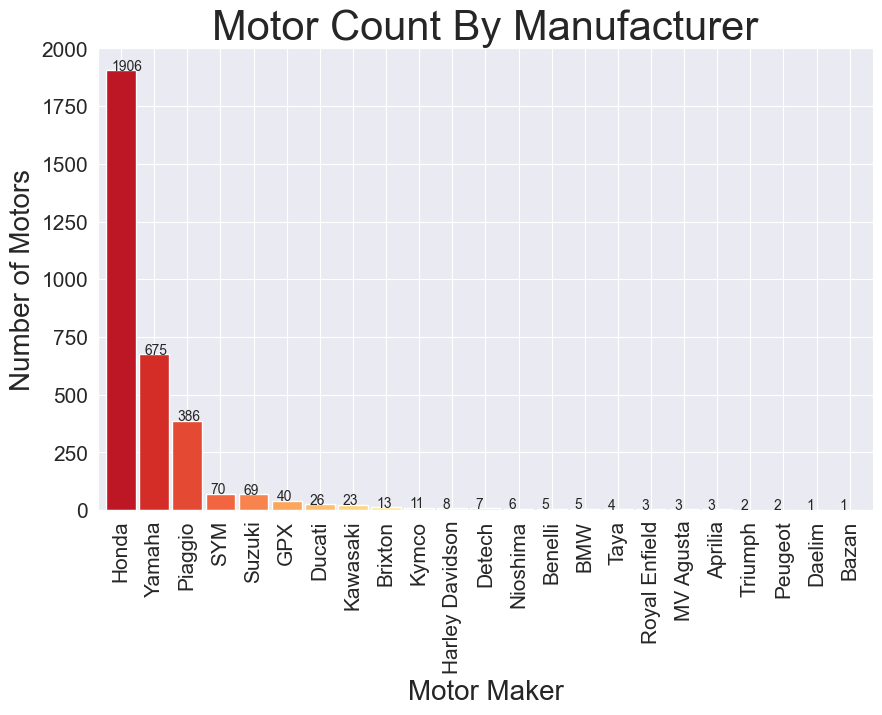

In [15]:
plt.subplots(figsize=(10,6))
ax=df['hang'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xticks(rotation='vertical')
plt.xlabel('Motor Maker',fontsize=20)
plt.ylabel('Number of Motors',fontsize=20)
plt.title('Motor Count By Manufacturer',fontsize=30)
ax.tick_params(labelsize=15)
#plt.yticks(rotation='vertical')
plt.show()
plt.show()

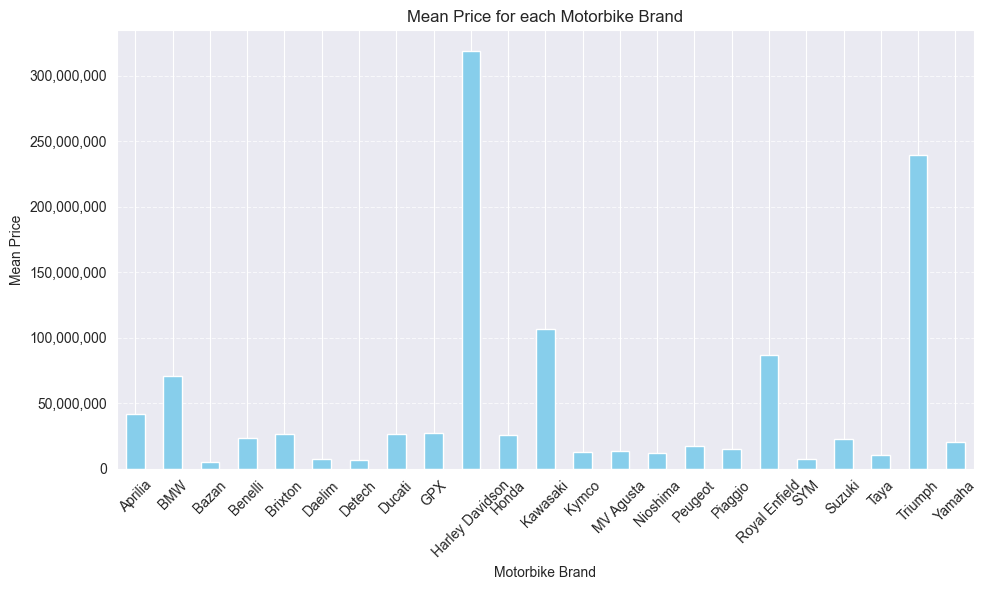

In [16]:
# Tính giá trung bình theo hãng
average_prices = df.groupby('hang')['price'].mean()

# Định dạng giá trị trục y
def y_format(x, pos):
    return '{:,.0f}'.format(x)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar', color='skyblue')
plt.title('Mean Price for each Motorbike Brand')
plt.xlabel('Motorbike Brand')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Sử dụng formatter cho trục y
formatter = FuncFormatter(y_format)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

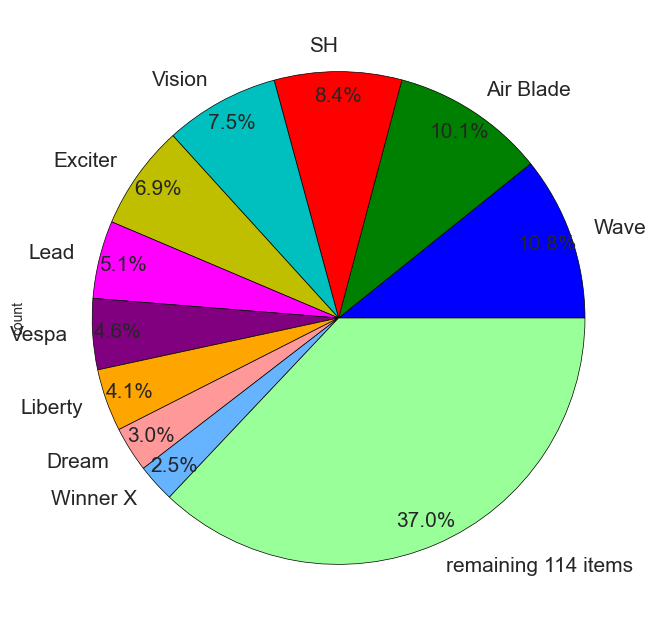

In [17]:
colors = ['b','g','r','c','y','magenta','purple','orange','#ff9999','#66b3ff','#99ff99']
temp = df['dong'].value_counts()
temp2 = temp.head(10)
if len(temp) > 10:
   temp2['remaining {0} items'.format(len(temp)-10)] = sum(temp[10:])
temp2.plot(kind='pie',autopct="%1.1f%%",shadow=False,fontsize=15,pctdistance=0.9,
           colors=colors,wedgeprops={"edgecolor":"0","linewidth":0.5,"linestyle":"solid","antialiased":True},
           figsize=(10,8)) 

pass

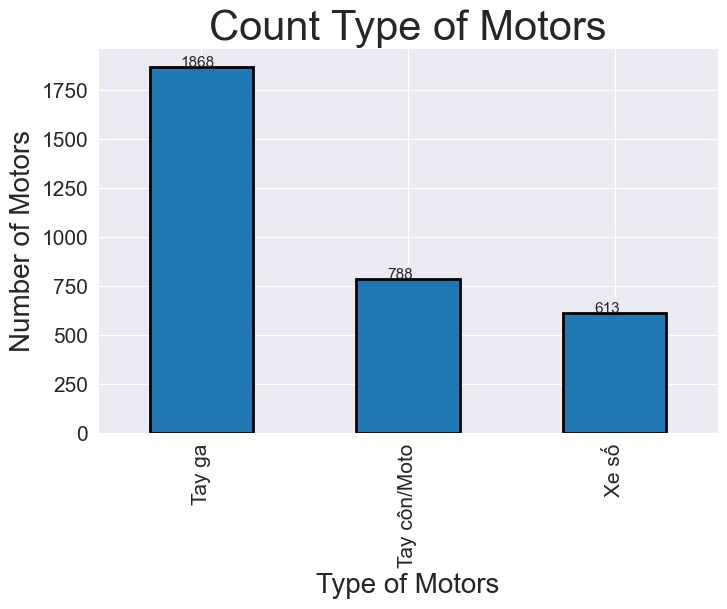

In [18]:
fig = plt.figure(figsize=(8, 5))
cars_type=df.groupby(['loaiXe']).count()['tinhTrang']
ax=cars_type.sort_values(ascending=False).plot.bar(edgecolor='k',linewidth=2)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1),fontsize=11)
plt.xticks(rotation='vertical')
plt.xlabel('Type of Motors',fontsize=20)
plt.ylabel('Number of Motors',fontsize=20)
plt.title('Count Type of Motors',fontsize=30)
ax.tick_params(labelsize=15)
#plt.yticks(rotation='vertical')
plt.show()

In [19]:
data = df.copy(deep=False)

In [20]:
df.columns

Index(['price', 'hang', 'dong', 'namdangki', 'soKM', 'tinhTrang', 'loaiXe',
       'dungTich', 'chinhSachBH'],
      dtype='object')

In [21]:
df['Age'] = 2024 - df['namdangki']
df.drop('namdangki',axis=1,inplace = True)

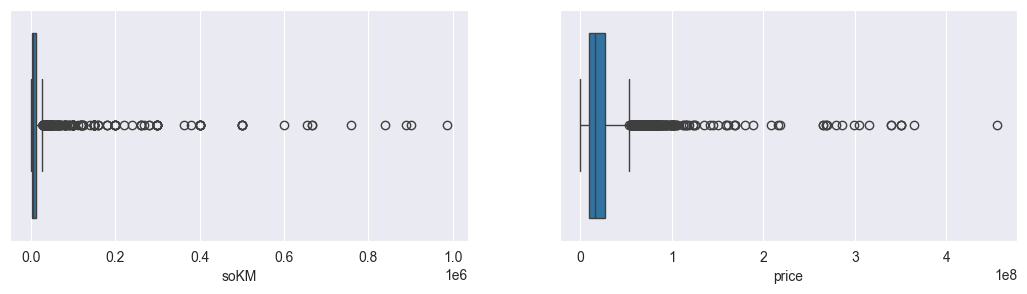

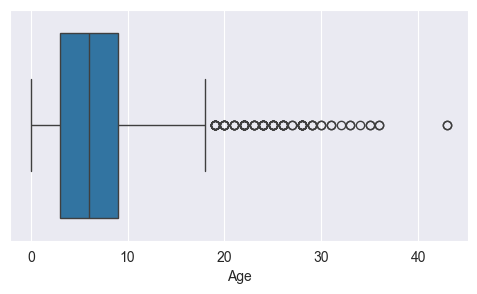

In [22]:
num_cols = ['soKM','price','Age']
i = 0
while i < len(num_cols):  # Dùng len(num_cols) thay vì 4
    fig = plt.figure(figsize=[13, 3])
    
    # Vẽ biểu đồ hộp cho cột đầu tiên
    plt.subplot(1, 2, 1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    # Vẽ biểu đồ hộp cho cột thứ hai
    if i < len(num_cols):  # Kiểm tra tránh lỗi khi i vượt quá phạm vi
        plt.subplot(1, 2, 2)
        sns.boxplot(x=num_cols[i], data=df)
        i += 1
    
    plt.show()


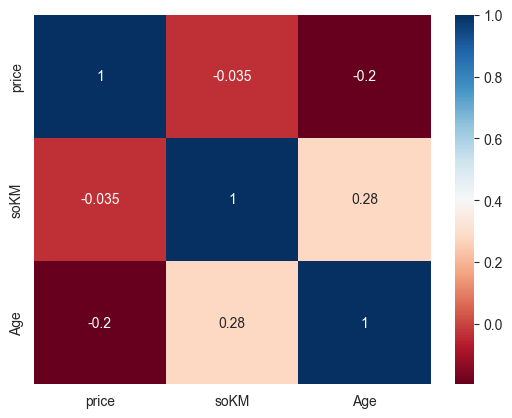

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lọc các cột số
numeric_df = df.select_dtypes(include=[np.number])

# Vẽ heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="RdBu")
plt.show()


In [24]:
numeric_df = df.select_dtypes(include=[np.number])

numeric_df.corr()['price']


price    1.000000
soKM    -0.034950
Age     -0.195077
Name: price, dtype: float64

In [25]:
df.pivot_table(values='price', index = 'loaiXe', columns= 'dungTich')

dungTich,100 - 175 cc,50 - 100 cc,Dưới 50 cc,Trên 175 cc
loaiXe,,,,
Tay côn/Moto,2.424972e+07,2.592727e+07,1.015000e+07,1.214219e+08
Tay ga,2.420339e+07,1.142622e+07,1.677931e+07,9.585000e+07
Xe số,1.139767e+07,1.194405e+07,9.014286e+06,NaN


In [26]:
df.pivot_table(values='price', index = 'loaiXe', columns= 'tinhTrang')

tinhTrang,Đã sử dụng
loaiXe,
Tay côn/Moto,3.419008e+07
Tay ga,2.416388e+07
Xe số,1.132754e+07


In [27]:
df.pivot_table(values='price', index = 'loaiXe', columns= 'hang')

hang,Aprilia,BMW,Bazan,Benelli,Brixton,Daelim,Detech,Ducati,GPX,Harley Davidson,Honda,Kawasaki,Kymco,MV Agusta,Nioshima,Peugeot,Piaggio,Royal Enfield,SYM,Suzuki,Taya,Triumph,Yamaha
loaiXe,,,,,,,,,,,,,,,,,,,,,,,
Tay côn/Moto,60000000.0,7.200000e+07,NaN,23320000.0,26476923.0,NaN,NaN,2.618077e+07,2.733840e+07,318750000.0,3.355061e+07,1.063077e+08,9400000.0,1.346667e+07,NaN,NaN,NaN,8.666667e+07,1.460000e+07,2.794808e+07,NaN,239500000.0,2.532956e+07
Tay ga,NaN,2.650000e+08,NaN,NaN,NaN,NaN,8.900000e+06,NaN,1.800000e+07,NaN,3.009655e+07,NaN,17750000.0,NaN,1.186667e+07,17000000.0,1.458639e+07,NaN,6.282500e+06,6.445455e+06,10350000.0,NaN,1.565858e+07
Xe số,4600000.0,4.833333e+06,4700000.0,NaN,NaN,7300000.0,5.966667e+06,NaN,NaN,NaN,1.199439e+07,NaN,11250000.0,NaN,NaN,NaN,NaN,NaN,7.511765e+06,7.483333e+06,NaN,NaN,8.502308e+06


In [28]:
df.pivot_table(values='price', index = 'loaiXe', columns= 'dong')

dong,48,67,102,2015 RSV4 R APRC ABS,899 panigale,@,Acruzo,Air Blade,Angela,Attila,BN 302,BX 125,BX 150,Beat,Beverly,Blade,Bullet 500,C400GT,C400X,C600,CB,CBR,CD,Candy Hi,Candy S,Chaly,Classic 500,Click,Cub,Cuxi,Demon 150GR,Dragster,Dream,Dylan,EN,Elegant,Elite,Elizabeth,Espero,Estrella,Exciter,FZ,Fly,Forza 300,Freego,Future,GD,GSX,GTS,GZ,Galaxy,Giorno,Grande,Hayate,Husky,Hypermotard,Impulse,Interceptor 650,Janus,Jupiter,K-Pipe,Kawasaki,LX,Latte,Lead,Legend 150S,Legend 200,Legend Gentleman 200,Liberty,MSX 125,MT,Medley,Mio,Monster,Ninja,Nio Fi 50cc,Nouvo,Nozza,Nvx,PCX,PS,Primavera,R,Raider,Rebel,SCR,SH,SH Mode,Sapphire,Satria,Scoopy,Scooter,Shadow,Shark,Sirius,Smash,Sonic,Spacy,Sport / Xipo,Sportster,Sprint,Street Triple,Street Twin,TFX,TNT,Taurus,Vario,Vespa,Vespa S125,Vision,Viva,Vulcan,W175,Wave,Win,Winner,Winner X,YAZ,Z1000,Z300,Z400,Z650,Z800,Zip
loaiXe,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Tay côn/Moto,3.216667e+08,15400000.0,NaN,60000000.0,350000000.0,NaN,NaN,NaN,NaN,NaN,37500000.0,25600000.0,26739999.9,NaN,NaN,NaN,60000000.0,72000000.0,NaN,NaN,95487500.0,3.361515e+07,102500000.0,NaN,NaN,NaN,85000000.0,NaN,NaN,NaN,20560000.0,1.346667e+07,2.500000e+07,NaN,2.016667e+07,NaN,NaN,NaN,NaN,29600000.0,1.759457e+07,1.891333e+07,NaN,NaN,2.180000e+07,1.500000e+07,17137500.0,29000000.0,NaN,37700000.0,NaN,NaN,NaN,NaN,15362500.0,11500000.0,NaN,115000000.0,15800000.0,NaN,9400000.0,22500000.0,NaN,NaN,NaN,3.033333e+07,3.114921e+07,26945432.0,NaN,2.064091e+07,5.061579e+07,NaN,NaN,13300000.0,7.766667e+07,NaN,NaN,NaN,3.370000e+07,1.500000e+07,NaN,NaN,3.417329e+07,2.271429e+07,1.161667e+08,NaN,2.587500e+07,NaN,NaN,2.694444e+07,1.580000e+07,NaN,305000000.0,8500000.0,NaN,NaN,25700000.0,NaN,24000000.0,317000000.0,NaN,180000000.0,299000000.0,3.130533e+07,19775000.0,NaN,NaN,NaN,NaN,NaN,NaN,25500000.0,38555555.2,1.110000e+07,3.167778e+07,1.523636e+07,2.242405e+07,82682711.2,267250000.0,56000000.0,95600000.0,1.379667e+08,116000000.0,NaN
Tay ga,NaN,NaN,17000000.0,NaN,NaN,15000000.0,11600000.0,1.802561e+07,NaN,3638750.0,NaN,NaN,NaN,NaN,20050000.0,NaN,NaN,NaN,NaN,265000000.0,NaN,NaN,NaN,18400000.0,15800000.0,NaN,NaN,8.709091e+06,90800000.0,9975000.0,18000000.0,NaN,1.000000e+07,23150000.0,NaN,NaN,13375000.0,3075000.0,8.900000e+06,NaN,1.255000e+07,5.600000e+06,4075000.0,88500000.0,2.044167e+07,NaN,NaN,NaN,50380000.0,NaN,NaN,1.433333e+07,1.858333e+07,4.988889e+06,NaN,NaN,9500000.0,NaN,16482000.0,1.380000e+07,NaN,NaN,9.942857e+06,20120000.0,1.427838e+07,NaN,NaN,NaN,9.221643e+06,NaN,NaN,47250000.0,9795000.0,NaN,NaN,1.186667e+07,4.521053e+06,8990200.0,2.841613e+07,2.063871e+07,18833333.0,3.454286e+07,NaN,NaN,NaN,5700000.0,6.609464e+07,43600000.0,16500000.0,NaN,1.239333e+07,12900000.0,NaN,8725000.0,6.133333e+06,NaN,NaN,37525000.0,NaN,NaN,50470000.0,NaN,NaN,NaN,NaN,NaN,3.640526e+07,1.430294e+07,12287500.0,2.076844e+07,NaN,NaN,NaN,8.083333e+06,NaN,NaN,2.140000e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.370968e+06
Xe số,NaN,NaN,NaN,4600000.0,NaN,NaN,NaN,1.933333e+07,5475000.0,1900000.0,NaN,NaN,NaN,7000000.0,NaN,9.383333e+06,NaN,NaN,4.833333e+06,NaN,NaN,NaN,12050000.0,NaN,7500000.0,8900000.0,NaN,NaN,10984375.0,NaN,NaN,NaN,1.595432e+07,NaN,1.850000e+07,7.671429e+06,NaN,NaN,5.966667e+06,NaN,1.155000e+07,NaN,NaN,NaN,NaN,1.429355e+07,NaN,10500000.0,NaN,NaN,10040000.0,NaN,1.350000e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.048214e+06,15000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.600000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.672727e+06,3000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4500000.0,NaN,NaN,NaN,1.650000e+07,4300000.0,NaN,NaN,1.057368e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.head()

,price,hang,dong,soKM,tinhTrang,loaiXe,dungTich,chinhSachBH,Age
0,68686868,Honda,SH,8000,Đã sử dụng,Tay ga,100 - 175 cc,Bảo hành hãng,2
1,68686868,Honda,SH,1000,Đã sử dụng,Tay ga,100 - 175 cc,Bảo hành hãng,2
2,62999999,Honda,SH,8900,Đã sử dụng,Tay ga,100 - 175 cc,Bảo hành hãng,6
3,6800000,Honda,Lead,16800,Đã sử dụng,Tay ga,100 - 175 cc,Bảo hành hãng,12
4,15600000,Honda,Air Blade,18600,Đã sử dụng,Tay ga,100 - 175 cc,Bảo hành hãng,8


In [30]:
df.drop(labels='tinhTrang',axis= 1, inplace = True)


In [31]:
df.drop(labels='chinhSachBH',axis= 1, inplace = True)


In [32]:
df = pd.get_dummies(data = df,drop_first=True) 

In [33]:
import pandas as pd

# Giả sử df là DataFrame của bạn
df_encoded = pd.get_dummies(df, drop_first=True)
# Giả sử df là DataFrame của bạn
df = df.astype(int)

# Kiểm tra lại kết quả
print(df.head())

# Kiểm tra kết quả
print(df_encoded.head())


      price   soKM  Age  hang_BMW  hang_Bazan  hang_Benelli  hang_Brixton  \
0  68686868   8000    2         0           0             0             0   
1  68686868   1000    2         0           0             0             0   
2  62999999   8900    6         0           0             0             0   
3   6800000  16800   12         0           0             0             0   
4  15600000  18600    8         0           0             0             0   

   hang_Daelim  hang_Detech  hang_Ducati  hang_GPX  hang_Harley Davidson  \
0            0            0            0         0                     0   
1            0            0            0         0                     0   
2            0            0            0         0                     0   
3            0            0            0         0                     0   
4            0            0            0         0                     0   

   hang_Honda  hang_Kawasaki  hang_Kymco  hang_MV Agusta  hang_Nioshima  \
0    

In [34]:
df.head()

,price,soKM,Age,hang_BMW,hang_Bazan,hang_Benelli,hang_Brixton,hang_Daelim,hang_Detech,hang_Ducati,hang_GPX,hang_Harley Davidson,hang_Honda,hang_Kawasaki,hang_Kymco,hang_MV Agusta,hang_Nioshima,hang_Peugeot,hang_Piaggio,hang_Royal Enfield,hang_SYM,hang_Suzuki,hang_Taya,hang_Triumph,hang_Yamaha,dong_67,dong_102,dong_2015 RSV4 R APRC ABS,dong_899 panigale,dong_@,dong_Acruzo,dong_Air Blade,dong_Angela,dong_Attila,dong_BN 302,dong_BX 125,dong_BX 150,dong_Beat,dong_Beverly,dong_Blade,dong_Bullet 500,dong_C400GT,dong_C400X,dong_C600,dong_CB,dong_CBR,dong_CD,dong_Candy Hi,dong_Candy S,dong_Chaly,dong_Classic 500,dong_Click,dong_Cub,dong_Cuxi,dong_Demon 150GR,dong_Dragster,dong_Dream,dong_Dylan,dong_EN,dong_Elegant,dong_Elite,dong_Elizabeth,dong_Espero,dong_Estrella,dong_Exciter,dong_FZ,dong_Fly,dong_Forza 300,dong_Freego,dong_Future,dong_GD,dong_GSX,dong_GTS,dong_GZ,dong_Galaxy,dong_Giorno,dong_Grande,dong_Hayate,dong_Husky,dong_Hypermotard,dong_Impulse,dong_Interceptor 650,dong_Janus,dong_Jupiter,dong_K-Pipe,dong_Kawasaki,dong_LX,dong_Latte,dong_Lead,dong_Legend 150S,dong_Legend 200,dong_Legend Gentleman 200,dong_Liberty,dong_MSX 125,dong_MT,dong_Medley,dong_Mio,dong_Monster,dong_Ninja,dong_Nio Fi 50cc,dong_Nouvo,dong_Nozza,dong_Nvx,dong_PCX,dong_PS,dong_Primavera,dong_R,dong_Raider,dong_Rebel,dong_SCR,dong_SH,dong_SH Mode,dong_Sapphire,dong_Satria,dong_Scoopy,dong_Scooter,dong_Shadow,dong_Shark,dong_Sirius,dong_Smash,dong_Sonic,dong_Spacy,dong_Sport / Xipo,dong_Sportster,dong_Sprint,dong_Street Triple,dong_Street Twin,dong_TFX,dong_TNT,dong_Taurus,dong_Vario,dong_Vespa,dong_Vespa S125,dong_Vision,dong_Viva,dong_Vulcan,dong_W175,dong_Wave,dong_Win,dong_Winner,dong_Winner X,dong_YAZ,dong_Z1000,dong_Z300,dong_Z400,dong_Z650,dong_Z800,dong_Zip,loaiXe_Tay ga,loaiXe_Xe số,dungTich_50 - 100 cc,dungTich_Dưới 50 cc,dungTich_Trên 175 cc
0,68686868,8000,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,68686868,1000,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,62999999,8900,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,6800000,16800,12,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,15600000,18600,8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [49]:
df.to_csv('data1.csv', index=False)


In [35]:
# Separating target variable and its features
y = df['price']
X = df.drop('price',axis=1)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (2615, 152)
x test:  (654, 152)
y train:  (2615,)
y test:  (654,)


In [38]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [39]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

Train R2-score : 0.8
Test R2-score : 0.69
Train CV scores : [0.75558294 0.64149969 0.72711993 0.50348945 0.74633864]
Train CV mean : 0.67


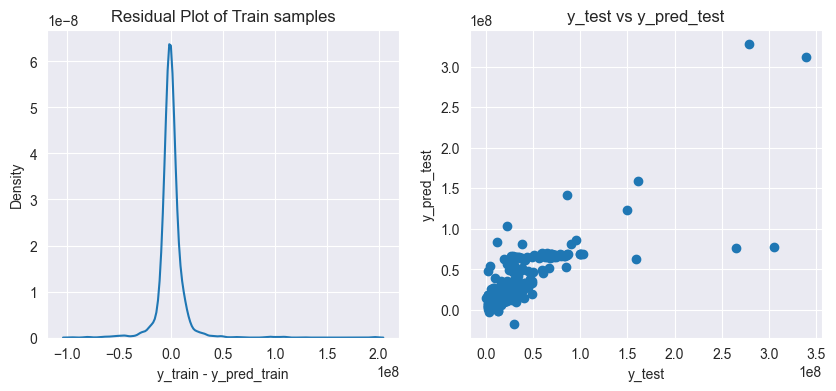

In [40]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

Train R2-score : 0.8
Test R2-score : 0.71
Train CV scores : [0.68919164 0.63890574 0.72979512 0.54728564 0.76899371]
Train CV mean : 0.67


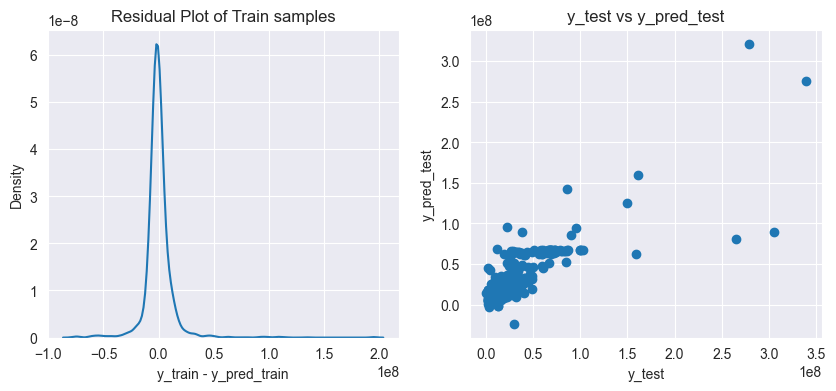

In [41]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

In [42]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

Train R2-score : 0.8
Test R2-score : 0.68
Train CV scores : [0.79793188 0.68869561 0.72683758 0.45783302 0.74261287]
Train CV mean : 0.68


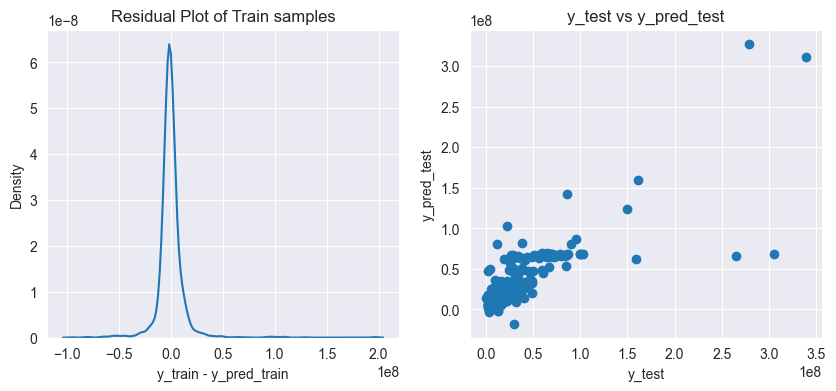

In [43]:
car_pred_model(ls_rs,"lasso.pkl")

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

Train R2-score : 0.9
Test R2-score : 0.73
Train CV scores : [0.71019883 0.62845746 0.77645247 0.35524218 0.77228606]
Train CV mean : 0.65


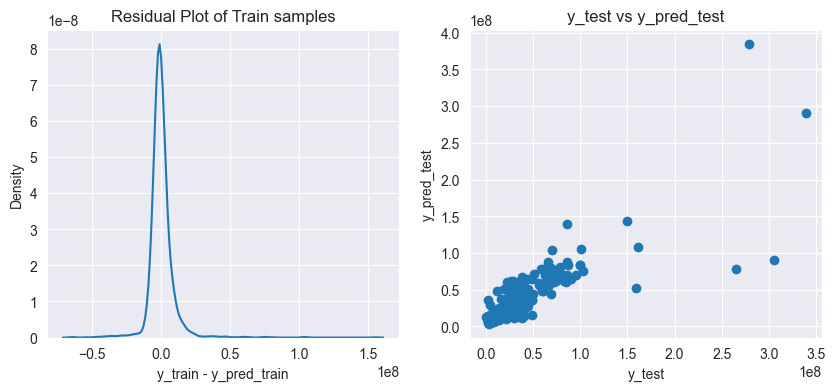

In [45]:
car_pred_model(gb_rs,"gradient_boosting.pkl")

Train R2-score : 0.96
Test R2-score : 0.82
Train CV scores : [0.66744161 0.73001085 0.80281673 0.55881294 0.78459906]
Train CV mean : 0.71


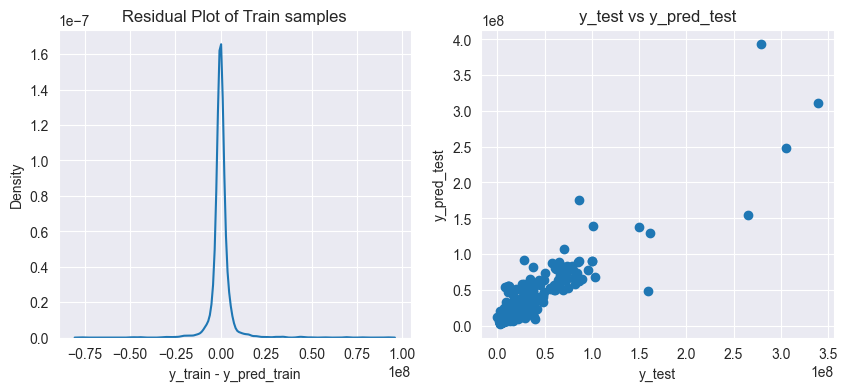

In [46]:
from sklearn.ensemble import RandomForestRegressor

# Khởi tạo mô hình Random Forest
rf = RandomForestRegressor(n_estimators=300, random_state=42)

# Gọi hàm car_pred_model với mô hình Random Forest
car_pred_model(rf, "Random_Forest_Model.pkl")


Train R2-score : 0.89
Test R2-score : 0.7
Train CV scores : [0.6203906  0.78243037 0.72969075 0.46114526 0.64160605]
Train CV mean : 0.65


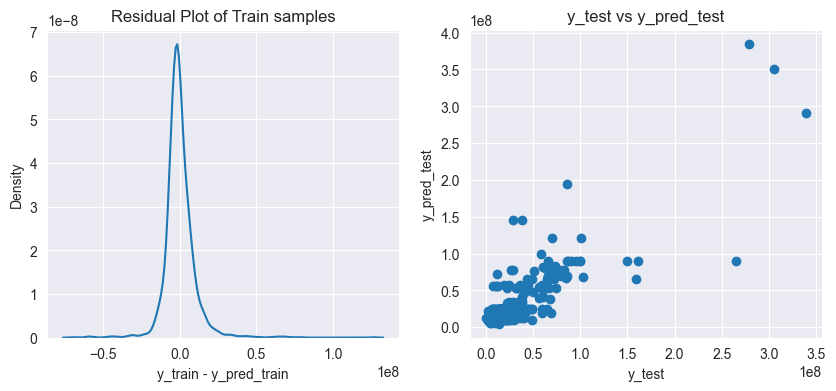

In [47]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)
car_pred_model(dt, "Tuned_Decision_Tree_Model.pkl")


In [48]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor","DecisionTreeRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.80,0.69,0.67
1,Ridge,0.80,0.71,0.67
2,Lasso,0.80,0.68,0.68
3,RandomForestRegressor,0.90,0.73,0.65
4,GradientBoostingRegressor,0.96,0.82,0.71
5,DecisionTreeRegressor,0.89,0.70,0.65
